##  Stack Overflow Annual Developer Survey

Stack Overflow’s annual Developer Survey is the largest and most comprehensive survey of people who code around the world. Since 2011, It has conducted this annual survey examining all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software.From these survey data for multiple years, we want to analyze certain trends over time. We want to find answers to the following questions in particular:
1. What languages were most popular in each year? Which language has gained most usage during the period of 2011-2019? Which language has lost most ground duing this same period?
1. What are the correlations between different programming languages in 2019? What are the correlation between language and developer types? What was the correlations between different programming languages in 2011?
1. What are the salary expectations for a programming language user in 2019? What was the salary expectations for a programming language user in 2011?

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

### Read the survey data for 9 years (2011-2019)

During the first five years (2011-2015), the survey data has an additional row in the csv file which should be discarded.

In [2]:
df={}
for year in range(2011,2020):
    if year<=2015:
        df[year] = pd.read_csv('./'+str(year)+'/survey_results_public.csv', encoding="ISO-8859-1", skiprows=1, na_values=['NA', 'NaN'])
    else:
        df[year] = pd.read_csv('./'+str(year)+'/survey_results_public.csv', encoding="ISO-8859-1", skiprows=0, na_values=['NA', 'NaN'])

c:\users\ahmed\appdata\local\conda\conda\envs\deep-learning\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\users\ahmed\appdata\local\conda\conda\envs\deep-learning\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\users\ahmed\appdata\local\conda\conda\envs\deep-learning\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed type

### Data Understanding

In [3]:
# Print the columns per year.
for i in range(2011, 2020):
    print("Year " + str(i))
    print(df[i].shape)
    print(list(df[i].columns))

Year 2011
(2813, 65)
['Response', 'Response.1', 'Response.2', 'Response.3', 'Response.4', 'Response.5', 'Response.6', 'Response.7', 'Influencer', 'Recommender', 'Approver', 'Purchaser', 'Check Writer', 'No Involvement', "I'm a Seller", 'Hardware', 'Servers', 'Software', 'User Equipment: Monitors, PCs, Laptops', 'Consultants', 'Other', '<$10,000', '$10,001 - $25,000', '$25,001 - $40,000', '$41,000 - $75,000', '$75,001 - $100,000', '$100,001 - $150,000', '>$150,000', "Don't know", 'Response.8', 'Java', 'JavaScript', 'CSS', 'PHP', 'Python', 'Ruby', 'SQL', 'C#', 'C++', 'C', 'Perl', 'None', 'other (please specify)', 'Response.9', 'Response.10', 'Response.11', 'iPhone', 'Android', 'Blackberry', 'Other Smart Phone', 'Regular Mobile Phone', 'Kindle', 'Nook', 'Blu-Ray', 'HDTV', 'AppleTV', 'iPad', 'Other netbook', 'PS3', 'Xbox', 'Wii', 'Other gaming system', 'other (please specify).1', 'Response.12', 'Response.13']
Year 2012
(6243, 75)
['Response', 'Response.1', 'Response.2', 'Response.3', 'Resp

In [4]:
# Print the statistics per year.
for i in range(2011, 2020):
    print("***Year " + str(i))
    print(df[i].shape)
    print(df[i].describe())

***Year 2011
(2813, 65)
                        Response  Response.1 Response.2 Response.3  \
count                       2813        1029       2729       2729   
unique                        19          51          8          4   
top     United States of America  California      25-29         11   
freq                        1037         122        831       1044   

               Response.4       Response.5                 Response.6  \
count                2729             2646                       2646   
unique                 12                6                         13   
top     Software Products  Start Up (1-25)  Web Application Developer   
freq                  814              745                       1066   

                       Response.7  Influencer  Recommender  ...  AppleTV  \
count                        2610        1361         1496  ...      116   
unique                          5           1            1  ...        1   
top     It's been known to happ

          Respondent    AssessJob1    AssessJob2    AssessJob3    AssessJob4  \
count   98855.000000  66985.000000  66985.000000  66985.000000  66985.000000   
mean    50822.971635      6.397089      6.673524      5.906875      4.065791   
std     29321.650410      2.788428      2.531202      2.642734      2.541196   
min         1.000000      1.000000      1.000000      1.000000      1.000000   
25%     25443.500000      4.000000      5.000000      4.000000      2.000000   
50%     50823.000000      7.000000      7.000000      6.000000      4.000000   
75%     76219.500000      9.000000      9.000000      8.000000      6.000000   
max    101592.000000     10.000000     10.000000     10.000000     10.000000   

         AssessJob5    AssessJob6    AssessJob7    AssessJob8    AssessJob9  \
count  66985.000000  66985.000000  66985.000000  66985.000000  66985.000000   
mean       3.953243      4.407196      5.673181      4.225200      7.640009   
std        2.520499      2.502069      2.9

## Question 1:

What languages were most popular in each year? Which language has gained most usage during the period of 2011-2019? Which language has lost most ground duing this same period?

**Identify the necessay columns:** Since each year, the survey data structure has changed a little bit, so we'll look into the following columns to answer the first question 

In [5]:
columns = {}
columns[2011] = ['Java', 'JavaScript', 'CSS', 'PHP', 'Python', 'Ruby', 'SQL', 'C#', 'C++', 'C', 'Perl']
columns[2012] = ['Java', 'JavaScript', 'CSS', 'PHP', 'Python', 'Objective-C', 'Ruby', 'SQL', 'C#', 'C++', 'C', 'Perl']
columns[2013] = ['C', 'C++', 'C#', 'Java', 'JavaScript', 'Node.js', 'Objective-C', 'PHP', 'Python', 'Ruby', 'SQL', 'Node.js.1', 'Haskell', 'CoffeeScript', 'Dart', 'TypeScript', 'C++11', 'F#']
columns[2014] = ['C', 'C++', 'C#', 'Java', 'JavaScript', 'Node.js', 'Objective-C', 'PHP', 'Python', 'Ruby', 'SQL', 'Node.js.1', 'Haskell', 'CoffeeScript', 'Dart', 'C++11', 'Redis', 'MongoDB', 'F#', 'Go']
columns[2015] = ['Current Lang & Tech: C', 'Current Lang & Tech: C++', 'Current Lang & Tech: C++11', 'Current Lang & Tech: C#', 'Current Lang & Tech: CoffeeScript', 'Current Lang & Tech: Clojure', 'Current Lang & Tech: Dart', 'Current Lang & Tech: F#', 'Current Lang & Tech: Go', 'Current Lang & Tech: Haskell', 'Current Lang & Tech: Java', 'Current Lang & Tech: JavaScript', 'Current Lang & Tech: Matlab', 'Current Lang & Tech: Node.js', 'Current Lang & Tech: Objective-C', 'Current Lang & Tech: Perl', 'Current Lang & Tech: PHP', 'Current Lang & Tech: Python', 'Current Lang & Tech: R', 'Current Lang & Tech: Ruby', 'Current Lang & Tech: Rust', 'Current Lang & Tech: Scala', 'Current Lang & Tech: SQL', 'Current Lang & Tech: SQL Server', 'Current Lang & Tech: Swift', 'Current Lang & Tech: Visual Basic']
columns[2016] = ['tech_do'] # sep=';'
columns[2017] = ['HaveWorkedLanguage'] # sep=';'
columns[2018] = ['LanguageWorkedWith'] # sep=';'
columns[2019] = ['LanguageWorkedWith'] # sep=';'

In [6]:
# Print the first five rows of the desired columns per year.
for i in range(2011, 2020):
    print("***Year " + str(i))
    print(df[i][columns[i]].head())
    

***Year 2011
   Java  JavaScript  CSS  PHP Python Ruby  SQL   C#  C++    C  Perl
0   NaN  JavaScript  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN   NaN
1  Java         NaN  NaN  NaN    NaN  NaN  SQL  NaN  NaN    C   NaN
2  Java  JavaScript  NaN  NaN    NaN  NaN  SQL  NaN  NaN  NaN   NaN
3  Java         NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN   NaN
4  Java  JavaScript  CSS  PHP    NaN  NaN  SQL  NaN  C++    C  Perl
***Year 2012
   Java  JavaScript  CSS  PHP Python  Objective-C Ruby  SQL   C#  C++    C  \
0  Java  JavaScript  NaN  NaN    NaN          NaN  NaN  SQL  NaN  C++    C   
1   NaN  JavaScript  CSS  PHP    NaN  Objective-C  NaN  NaN  NaN  C++  NaN   
2   NaN         NaN  CSS  PHP    NaN  Objective-C  NaN  SQL  NaN  NaN  NaN   
3  Java         NaN  NaN  NaN    NaN          NaN  NaN  NaN  NaN  C++  NaN   
4  Java         NaN  NaN  NaN    NaN          NaN  NaN  NaN  NaN  NaN  NaN   

  Perl  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  
***Year 2013
     C  C++   C#  Java  JavaSc

In [7]:
## Since there is hundreds of languages, so we are only analyzing top ten languages here
languages10 = [ 'JavaScript','SQL', 'Python','Java', 'C#','PHP', 'C++', 'C', 'Ruby', 'Objective-C']

In [8]:
## delete the rows containing all nan values in the desired columns
for year in range(2011, 2020):
  before = df[year].shape[0]
  df[year] = df[year].dropna(subset=columns[year], how='all').reset_index(drop=True)
  after = df[year].shape[0]

In [9]:
## Due to similar data structure in 2016-2019 to record the language used,we are defining a fuction to calculate the percenatge usage of each language
def get_counts_2016_2019(df,col_name):
    counts = {}
    sep = ';'
    for i in range(0, df.shape[0]):
        if col_name in df.columns:
            cell = df[col_name][i]
        cell = str(cell)
        if cell == 'nan':
            continue;
        for value in str(cell).split(sep):
            value = value.strip()
            if value in counts:
                counts[value] += 1
            else:
                counts[value] = 1
    for i in counts:
        counts[i] /= df.shape[0]
    return counts;


In [10]:
## Due to similar data structure in 2011-2014 to record the language used,we are defining a fuction to calculate the percenatge usage of each language
def get_counts_2011_2014(df, columns):
    counts = {}
    for col in columns:
        counts[col] = 1 - (df[col].isna().sum() / df.shape[0])
    return counts;

## Due to a unique data structure in 2015 to record the language used,we are defining a fuction to calculate the percenatge usage of each language
def get_counts_2015(df, columns):
    counts = {}
    for col in columns:
        counts[col.split(':')[1].strip()] = 1 - (df[col].isna().sum() / df.shape[0])
    return counts;

In [11]:
## This fuction can calculate the percenatge usage of each language for any year by switching to appropriate function 
def get_counts(year):
  if (year < 2015):
    counts = get_counts_2011_2014(df[year], columns[year])
  elif (year==2015):
    counts=get_counts_2015(df[year], columns[year])
  else:
    counts = get_counts_2016_2019(df[year],columns[year][0])
  return counts

# Print results for a single language to check results.
for i in range(2011, 2020):
  print('Year {}: {}'.format(i, get_counts(i)['Java']))

Year 2011: 0.3395110410094637
Year 2012: 0.42972181551976574
Year 2013: 0.3781617831204608
Year 2014: 0.38279802347127856
Year 2015: 0.37746854046110034
Year 2016: 0.36597654258031614
Year 2017: 0.39655972696245734
Year 2018: 0.4534557152705083
Year 2019: 0.4101565622537656


In [12]:
# Create a dataframe to store the usage results
usage = pd.DataFrame(columns=range(2011, 2019 + 1), index=languages10, dtype=np.float)
usage = usage.fillna(0)

for year in range(2011, 2020):
    counts = get_counts(year)
    for lang in languages10:
        if lang in counts:
            usage[year][lang] = counts[lang]

usage

,2011,2012,2013,2014,2015,2016,2017,2018,2019
JavaScript,0.559543,0.572291,0.592913,0.584157,0.549371,0.558593,0.624573,0.698113,0.676255
SQL,0.636041,0.602855,0.575131,0.535361,0.433499,0.448261,0.512055,0.570250,0.542932
Python,0.226735,0.221449,0.235412,0.227455,0.240562,0.250525,0.319563,0.387558,0.416163
Java,0.339511,0.429722,0.378162,0.382798,0.377469,0.365977,0.396560,0.453456,0.410157
C#,0.533123,0.451684,0.379038,0.367202,0.319142,0.311739,0.340642,0.344091,0.309436
PHP,0.310726,0.352306,0.291009,0.264052,0.299853,0.260683,0.280956,0.307287,0.262993
C++,0.291798,0.279283,0.212372,0.218962,0.208000,0.195594,0.222662,0.253683,0.234375
C,0.292192,0.271596,0.179815,0.181285,0.165886,0.156614,0.190416,0.230321,0.205746
Ruby,0.112382,0.105600,0.099424,0.091569,0.081060,0.089403,0.090758,0.100991,0.083717
Objective-C,0.000000,0.110725,0.119584,0.104231,0.078947,0.065314,0.064137,0.070340,0.047859


### Use Tabluea to visualize the result

We have used a Rank tutorial in Tableau (https://www.analytics-tuts.com/rank-chart-in-tableau/) to visualize the usage result in a nice ranking matrix. This dashboard is available  at Tableau Public:(https://public.tableau.com/profile/ahmed.hasan2252#!/vizhome/Usage_Ranking_Programming_Languages_2011_2109/Dashboard1?publish=yes)

![](ranking.PNG)

## Observation:

JavaScript and SQL remain the top two programming languages for quite some time, but Python seems the fastest growing major programming language. During the last three years, Python has edged out PHP, C# and Java and it is now the third used language among the developers. C# seems to be losing the ground among the developers faster than other major programming language.

## Question 2: 
What are the correlations between different programming languages in 2019? What are the correlation between language and developer types? What was the correlations between different programming languages in 2011?

### Load the data

In [13]:
df_2019 = pd.read_csv('./'+str(2019)+'/survey_results_public.csv', encoding="ISO-8859-1", skiprows=0, na_values=['NA', 'NaN'])
df_2011 = pd.read_csv('./'+str(2011)+'/survey_results_public.csv', encoding="ISO-8859-1", skiprows=1, na_values=['NA', 'NaN'])

### Languages correlations in 2019

In [14]:
df_2019=df_2019.dropna(subset=['LanguageWorkedWith'], how='any').reset_index(drop=True)

In [15]:
def get_language_corr_2019(df):
    correlation = pd.DataFrame(columns=languages10, index=df.Respondent, dtype=np.float)
    correlation = correlation.fillna(0)
    sep=';'
    for i in range(0, df.shape[0]):
        if 'LanguageWorkedWith' in df.columns:
            langs = df.LanguageWorkedWith[i]
        if 'Respondent' in df.columns:
            id=df.Respondent[i]
        cell = str(langs)
        if cell == 'nan':
            continue;
        for value in str(cell).split(sep):
            value = value.strip()
            if value in languages10: 
                correlation[value][id]=1
    return correlation

In [16]:
lang_corr_2019=get_language_corr_2019(df_2019)

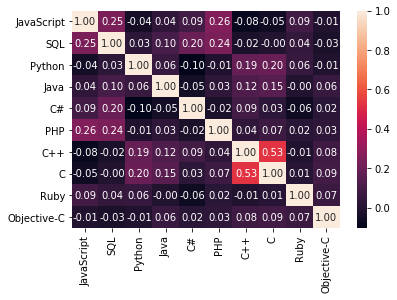

In [17]:
sns.heatmap(lang_corr_2019.corr(),annot=True, fmt='0.2f')

### Observation:
Since most developers tend to use multiple programming languages, there is some correlation between different programming languages. So if a developer is using C, there is a strong probability that he/she is also using C++. Developers also tend to use JavaScript, PHP and SQL together. There is also some strong correlations between C# and SQL and C,C++ and Python.

### Language and Developer correlations

In [18]:
# Interested in 8 developer types
developers5=['Data or business analyst','Data scientist or machine learning specialist','Developer, front-end','Developer, back-end','Developer, full-stack']

In [19]:
def get_lang_dev_corr(df):
  correlation1 = pd.DataFrame(columns=languages10, index=df.Respondent, dtype=np.float)
  correlation1 = correlation1.fillna(0)
  correlation2 = pd.DataFrame(columns=developers5, index=df.Respondent, dtype=np.float)
  correlation2 = correlation2.fillna(0)
  sep=';'
  for i in range(0, df.shape[0]):
    if 'LanguageWorkedWith' in df.columns:
        langs = df.LanguageWorkedWith[i]
    if 'Respondent' in df.columns:
        id=df.Respondent[i]
    if 'DevType' in df.columns:
        devs = df.DevType[i]
    cell = str(langs)
    if cell == 'nan':
      continue;
    for value in str(cell).split(sep):
      value = value.strip()
      if value in languages10: 
        correlation1[value][id]=1
    cell = str(devs)
    if cell == 'nan':
      continue;
    for value in str(cell).split(sep):
      value = value.strip()
      if value in developers5: 
        correlation2[value][id]=1
  return correlation1,correlation2

In [20]:
# Drop row contatining nan values
df_2019=df_2019.dropna(subset=['LanguageWorkedWith','DevType'], how='any').reset_index(drop=True)

In [21]:
c1,c2=get_lang_dev_corr(df_2019)

In [22]:
c1=c1.reset_index()
c2=c2.reset_index()
c3=pd.merge(c1,c2)


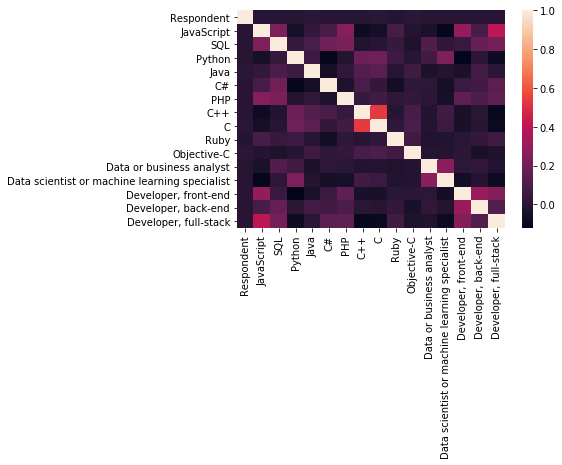

In [23]:
sns.heatmap(c3.corr(),annot=False, fmt='0.2f')

### Observation
There is correlation between developer types and languages.
1. Data or business analyst- SQL, Python
1. Data scientist- Python
1. Front-end developer- JavaScript, PHP
1. Back-end developer- SQL, PHP
1. Full-stack developer- Javascript, SQL, PHP

### Languages correlations in 2011

In [24]:
df_2011=df_2011.dropna(subset=columns[2011], how='all').reset_index(drop=True)

In [25]:
def get_language_corr_2011(df,columns):
    df=df[columns]
    Objective_C=[]
    for i in df.index:
        Objective_C.append(np.nan)
    df['Objective-C']=Objective_C
    df=df[languages10]
    return df.applymap(convert_nan)

In [26]:
def convert_nan(lang):
    if pd.isnull(lang):
        return 0
    else:
        return 1

In [27]:
lang_corr_2011=get_language_corr_2011(df_2011,columns[2011])

c:\users\ahmed\appdata\local\conda\conda\envs\deep-learning\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


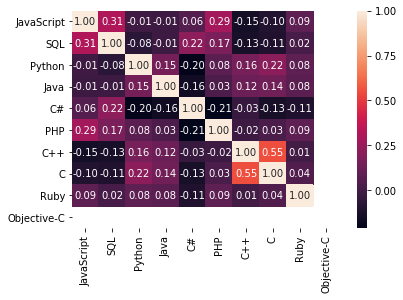

In [28]:
sns.heatmap(lang_corr_2011.corr(),annot=True, fmt='0.2f')

### Observation:
The correlations among different programming languages in 2011 was almost same like 2019. There was no entry for Objective-C in 2011, so the correlations with objective-C is null. If a developer is using C, there is a strong probability that he/she is also using C++. Developers also tend to use JavaScript, PHP and SQL together. There is also some strong correlations between C# and SQL and C,C++ and Python.


## Question 3:
What are the salary expectations for a programming language user in 2019? What was the salary expectations for a programming language user in 2011?

In [29]:
df_2019 = pd.read_csv('./'+str(2019)+'/survey_results_public.csv', encoding="ISO-8859-1", skiprows=0, na_values=['NA', 'NaN'])
df_2011 = pd.read_csv('./'+str(2011)+'/survey_results_public.csv', encoding="ISO-8859-1", skiprows=1, na_values=['NA', 'NaN'])

### Salary expectation in 2019

In [30]:
def mean_amt(df,col_name, col_mean, look_for):
  new_df=defaultdict(int)
  square_df=defaultdict(int)
  denoms=defaultdict(int)
  sep=';'
  for i in range(0, df.shape[0]):
    if 'LanguageWorkedWith' in df.columns:
        langs = df.LanguageWorkedWith[i]
    if 'Respondent' in df.columns:
        id=df.Respondent[i]
    cell = str(langs)
    if cell == 'nan':
      continue;
    for value in str(cell).split(sep):
      value = value.strip()
      if value in look_for and df[col_mean][i]>0: 
        new_df[value]+=df[col_mean][i]
        square_df[value]+=df[col_mean][i]**2
        denoms[value]+=1
  new_df=pd.DataFrame(pd.Series(new_df)).reset_index()
  square_df=pd.DataFrame(pd.Series(square_df)).reset_index()
  denoms=pd.DataFrame(pd.Series(denoms)).reset_index()
  new_df.columns=[col_name,'col_sum']
  square_df.columns=[col_name,'col_square']
  denoms.columns=[col_name,'col_total']
  df_means=pd.merge(new_df,denoms)  
  df_all=pd.merge(df_means,square_df)
  df_all['mean_col']=df_means['col_sum']/df_means['col_total']
  df_all['var_col']=df_all['col_square']/df_all['col_total']-df_all['mean_col']**2
  df_all['std_col']=np.sqrt(df_all['var_col'])
  df_all['lower_95']=df_all['mean_col']-1.96*df_all['std_col']/np.sqrt(df_all['col_total'])
  df_all['upper_95']=df_all['mean_col']+1.96*df_all['std_col']/np.sqrt(df_all['col_total'])
  return df_all

In [31]:
mean_salary_2019=mean_amt(df_2019,'LanguageWorkedWith','ConvertedComp',languages10)

In [32]:
mean_salary_2019.sort_values('mean_col',ascending=False)

,LanguageWorkedWith,col_sum,col_total,col_square,mean_col,var_col,std_col,lower_95,upper_95
7,Ruby,8.248140e+08,5140,6.624318e+14,160469.640078,1.031273e+11,321134.368472,151690.311588,169248.968568
3,Python,3.124600e+09,22039,2.518151e+15,141775.932574,9.415843e+10,306852.455107,137724.676163,145827.188985
9,Objective-C,3.963357e+08,2825,3.101214e+14,140295.811327,9.009456e+10,300157.560329,129227.123680,151364.498975
2,C#,2.375975e+09,18018,1.864022e+15,131866.736264,8.606448e+10,293367.477288,127583.078696,136150.393831
1,C++,1.379874e+09,10640,1.072292e+15,129687.383459,8.396054e+10,289759.454424,124181.552510,135193.214407
4,SQL,4.067060e+09,31571,3.165695e+15,128822.643629,8.367697e+10,289269.717113,125631.731292,132013.555966
6,JavaScript,4.975920e+09,38885,3.876278e+15,127965.016124,8.331064e+10,288635.819313,125096.117217,130833.915032
0,C,1.119365e+09,8791,8.810084e+14,127330.814014,8.400395e+10,289834.352418,121272.011598,133389.616431
5,Java,2.580362e+09,21072,1.948580e+15,122454.540480,7.747735e+10,278347.526837,118696.248135,126212.832826
8,PHP,1.428487e+09,13811,1.084659e+15,103431.120773,6.783791e+10,260457.120831,99087.221521,107775.020026


### Observation:
By analyzing developer’s annual salary and their programming language usages, we can get the expectation in learning top 10 programming languages in terms of mean salaries and 95% confidence limits. The 95% confidence limits depend on the number of responses. For higher number of responses, the 95% confidence limit gets narrower and for lower number of responses, the 95% confidence limit gets wider. From our analysis, developers who are using Ruby programming language are getting the highest mean salary, followed by Python and Objective-C users.

In [33]:
def mean_amt2(df,col_name, col_mean, look_for):
  
  new_df=defaultdict(list)
  square_df=defaultdict(int)
  denoms=defaultdict(int)
  sep=';'
  for i in range(0, df.shape[0]):
    if 'LanguageWorkedWith' in df.columns:
        langs = df.LanguageWorkedWith[i]
    if 'Respondent' in df.columns:
        id=df.Respondent[i]
    cell = str(langs)
    if cell == 'nan':
      continue;
    for value in str(cell).split(sep):
      value = value.strip()
      if value in look_for and df[col_mean][i]>0: 
        new_df['lang'].append(value)
        new_df['salary'].append(df[col_mean][i])
  new_df=pd.DataFrame(new_df)

  return new_df

In [35]:
df4=mean_amt2(df_2019,'LanguageWorkedWith','ConvertedComp',languages10)

In [36]:
df4

,lang,salary
0,C,61000.0
1,C++,61000.0
2,C#,61000.0
3,Python,61000.0
4,SQL,61000.0
5,Java,366420.0
6,SQL,366420.0
7,C#,95179.0
8,JavaScript,95179.0
9,Python,95179.0


### Salary expectation in 2011

In [37]:
salary_ranges=['<$10,000', '$10,001 - $25,000', '$25,001 - $40,000', '$41,000 - $75,000', '$75,001 - $100,000', '$100,001 - $150,000', '>$150,000']

In [38]:
def get_lang_salary_corr(df,columns):
  df_lang=df[columns]
  Objective_C=[]
  for i in df.index:
    Objective_C.append(np.nan)
  df_lang['Objective-C']=Objective_C
  correlation1 = df_lang[languages10]
  correlation2 = df[salary_ranges]
  return correlation1.applymap(convert_nan),correlation2.applymap(convert_nan)

In [39]:
c1,c2=get_lang_salary_corr(df_2011,columns[2011])
c1=c1.reset_index()
c2=c2.reset_index()
c3=pd.merge(c1,c2)

c:\users\ahmed\appdata\local\conda\conda\envs\deep-learning\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


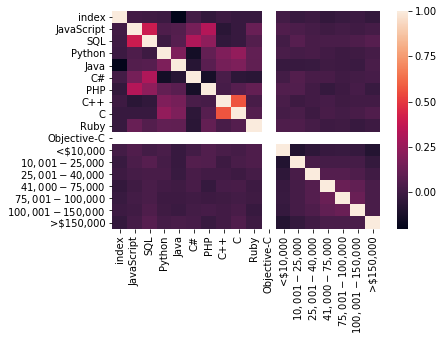

In [40]:
sns.heatmap(c3.corr(),annot=False, fmt='0.2f')

In [41]:
c3.corr()

,index,JavaScript,SQL,Python,Java,C#,PHP,C++,C,Ruby,Objective-C,"<$10,000","$10,001 - $25,000","$25,001 - $40,000","$41,000 - $75,000","$75,001 - $100,000","$100,001 - $150,000",">$150,000"
index,1.000000,0.007841,-0.003109,-0.012647,-0.200723,0.012213,-0.041242,-0.004030,-0.023206,-0.027110,NaN,0.010469,-0.019453,-0.006425,-0.038607,-0.021529,-0.009011,-0.034002
JavaScript,0.007841,1.000000,0.401569,0.047507,0.061209,0.156529,0.331705,-0.068289,-0.023878,0.118367,NaN,0.051992,0.034653,0.015150,-0.001120,0.010631,0.004610,0.019234
SQL,-0.003109,0.401569,1.000000,-0.004831,0.070643,0.317578,0.229133,-0.042971,-0.022675,0.058547,NaN,0.012750,0.067197,0.024635,0.033423,0.029141,0.045009,0.068257
Python,-0.012647,0.047507,-0.004831,1.000000,0.183635,-0.138256,0.107823,0.185673,0.243219,0.101501,NaN,0.029838,0.017932,0.025014,0.007147,-0.004253,0.000043,0.015141
Java,-0.200723,0.061209,0.070643,0.183635,1.000000,-0.075370,0.076971,0.160303,0.180711,0.099103,NaN,-0.023310,-0.025171,-0.021348,-0.002906,-0.005440,-0.015339,0.031568
C#,0.012213,0.156529,0.317578,-0.138256,-0.075370,1.000000,-0.129503,0.031249,-0.058383,-0.065973,NaN,0.013277,0.061800,0.027705,0.027825,0.004774,0.010622,0.022269
PHP,-0.041242,0.331705,0.229133,0.107823,0.076971,-0.129503,1.000000,0.022844,0.069057,0.107993,NaN,0.056545,0.053092,0.006834,-0.027597,-0.004996,0.023442,-0.021997
C++,-0.004030,-0.068289,-0.042971,0.185673,0.160303,0.031249,0.022844,1.000000,0.572007,0.026829,NaN,0.031029,-0.004071,0.009025,0.022287,-0.000324,0.009273,0.005722
C,-0.023206,-0.023878,-0.022675,0.243219,0.180711,-0.058383,0.069057,0.572007,1.000000,0.063990,NaN,0.016200,0.031917,-0.005345,0.028679,0.012886,0.028679,0.049478
Ruby,-0.027110,0.118367,0.058547,0.101501,0.099103,-0.065973,0.107993,0.026829,0.063990,1.000000,NaN,0.045428,0.043680,0.017232,-0.004347,-0.002480,-0.023336,-0.006750


### Observation:
Since we can only get a salary range in 2011 survey data, we cannot calculate mean salary and 95% confidence limit from 2011 survey data. So we have done a correlation between porgramming language and different salry ranges. From the correlation, we can say that SQL programmers were earning the most in 2011, followed by C and Java programmers.